In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, layers
from keras.src.utils import np_utils
from keras.layers import Dense

## **Loading data and Pre - procesing**

In [ ]:
data = pd.read_csv("flag.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape)

(6315, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X = min_max.fit_transform(X)
X = np.column_stack((np.ones_like(y), X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
print(X_train.shape, X_test.shape)
print(X_train[:5])

(5052, 3) (1263, 3)
[[1.         0.53963491 0.75850058]
 [1.         0.11081216 0.10308474]
 [1.         0.71288496 0.43620848]
 [1.         0.15988466 0.33521464]
 [1.         0.16120591 0.75619273]]


In [ ]:
# One hot encoding all targets

y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)

## **Build model to classify data**

In [ ]:
class SoftmaxRegression():
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.weight = None

  # activation function of each data point
  def activation_function(self, z):

    # z is a list that consists of all the nodes in layer 2 before putting into activation function
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

  # cross entropy loss of each data point
  def cross_entropy_loss(self, y_pred, y_test):
    loss = - np.sum(y_test* np.log(y_pred))
    return loss

  # gradient of the loss function for each data point
  def gradient(self, data_point, target, y_pred):
    return data_point@(target - y_pred)

  # build model using SGD
  def fit_SGD(self, X_train, y_train):
    np.random.seed(42)
    self.weight = np.random.randn(X_train.shape[1], y_train.shape[1])
    loss_history = []
    num_epochs = 1000

    for epoch in range(num_epochs):
      for id in range(len(X_train)):
        # get each data point in train set
        data_point = X_train[id]

        # z - all nodes in the layer 2 (before activate)
        z = self.weight.T @ data_point
        y_pred = self.activation_function(z)

        grad = self.gradient(data_point, y_train[id], y_pred)
        self.weight += self.learning_rate* grad
        loss_history.append(self.cross_entropy_loss(y_pred, y_train[id]))

    return self.weight, loss_history

  # evaluate the accuracy
  def compute_accuracy(self, y_test):
    comparison = []
    for index, data_point in enumerate(X_test):
      prob = self.activation_function(self.weight.T @ data_point)
      prediction = []
      for id in range(len(prob)):
        if prob[id] != np.max(prob):
          prediction.append(0)
        else:
          prediction.append(1)
      if np.sum(np.equal(prediction, y_test[index])) == len(y_test[index]):
        comparison.append(True)
      else:
        comparison.append(False)

    return comparison

In [ ]:
# run my gorgeous model

softmax = SoftmaxRegression(learning_rate = 0.01)
weight, loss_history = softmax.fit_SGD(X_train, y_train)
comparison = softmax.compute_accuracy(y_test)

In [ ]:
print(weight)
print(np.sum(comparison)* 1./1263)
print(X_test.shape)

[[-13366.14031699 -13366.77529544 -13365.9893426 ]
 [-13365.11400128 -13366.87118452 -13366.8711681 ]
 [-13365.05781833 -13365.86959641 -13367.10650553]]
0.34441805225653205
(1263, 3)


In [ ]:
start = 10
while start < 10000:
  print(loss_history[start])
  start += 10

2.1748241792683745
0.10209661934412965
1.2351715843149909
0.3588906033461701
0.40141587663814726
0.08889293743957154
2.1767582123574307
2.4547307216128673
0.4090733853381369
0.322775543297635
2.0366072275741915
0.3158140419115213
0.2100564153398979
0.28974576414469866
2.3969336919373565
2.535424812399498
2.186481184852847
0.3525741847535124
2.3241598765404774
2.444856026435682
2.0120363569812216
0.40841095797603527
2.851124696984093
2.0934238776733753
1.763326789916364
2.1866824006907515
2.2506067162813586
2.9389839973984504
0.2811881101119914
0.1318899258298072
1.169300113155465
1.7322029893596662
1.946528469804674
2.2489535015038746
1.1604545805667046
2.6454350533115454
1.6950267314605854
0.23285458205517356
1.1619346014793892
1.051852716128693
2.819388371163505
1.205732658333726
0.24468908022685817
2.492602821751972
2.795786123957192
2.6989286257297675
0.148760807546646
1.2990166606321836
1.215914230977636
2.2355959780915677
1.5615203813998004
1.4275520165814863
0.10694941684415298


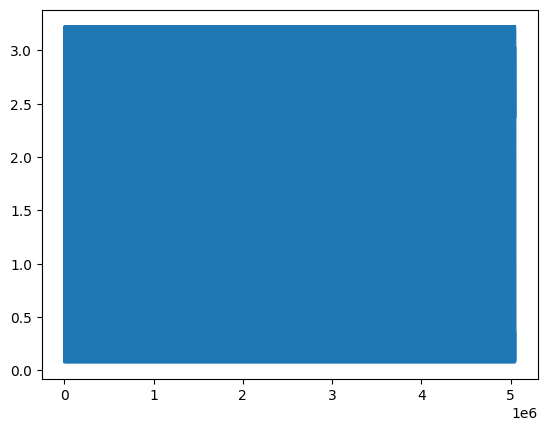

In [ ]:
plt.plot(loss_history)